# TP10 - Topic Modeling and sentiment analyses 

The data set we will use is a compilation of customer reviews.

# Import the data 

In [1]:
import pandas as pd 
df = pd.read_csv("data/abcnews-date-text.csv") 

In [2]:
df.head()

publish_date                                      headline_text
0      20030219  aba decides against community broadcasting lic...
1      20030219     act fire witnesses must be aware of defamation
2      20030219     a g calls for infrastructure protection summit
3      20030219           air nz staff in aust strike for pay rise
4      20030219      air nz strike to affect australian travellers

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186018 entries, 0 to 1186017
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1186018 non-null  int64 
 1   headline_text  1186018 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.1+ MB


# Data Pre-processing

In [4]:
#Loading nltk libraries

from nltk.tokenize import WhitespaceTokenizer;
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [5]:
# perform lemmatize and stem preprocessing steps on the data set using functions

tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
pst = PorterStemmer()

def process_text(text):
    return [pst.stem(lemmatizer.lemmatize(word)) for word in tokenizer.tokenize(text)]


In [25]:
# Select a document to preview after preprocessing
document = "ratepayers group wants compulsory local govt voting"

process_text(document)

['ratepay', 'group', 'want', 'compulsori', 'local', 'govt', 'vote']

example : <br/>
original document: 
['ratepayers', 'group', 'wants', 'compulsory', 'local', 'govt', 'voting']


 tokenized and lemmatized document: 
['ratepay', 'group', 'want', 'compulsori', 'local', 'govt', 'vote']

In [57]:
# Preprocess the headline text, saving the results as ‘processed_docs’

processed_docs = df.headline_text.apply(process_text)

processed_docs.head()

0     [aba, decid, against, commun, broadcast, licenc]
1          [act, fire, wit, must, be, awar, of, defam]
2    [a, g, call, for, infrastructur, protect, summit]
3    [air, nz, staff, in, aust, strike, for, pay, r...
4    [air, nz, strike, to, affect, australian, travel]
Name: headline_text, dtype: object

# Bag of words on the data set

In [8]:

# Create a dictionary from "processed_docs", save the results as ‘dictionary’

from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(processed_docs)

In [9]:
# Print the 10 first values
for i in range(10):
    print(dictionary[i])

aba
against
broadcast
commun
decid
licenc
act
awar
be
defam


# Gensim filters 
filters out tokens that appear in : <br>
    <ul>
    <li>less than X documents (absolute number)</li>
    <li>more than Y documents (fraction of total corpus size, not absolute number)</li>
    <li>after the above two steps, keep only the first Z most frequent tokens</li>
    </ul>
Determine X YZ according to the issue

In [16]:
# filter data using the function "filter_extremes" in "dictionary"

dictionary.filter_extremes()

len(dictionary)

28351

### Gensim doc2bow

For each document we create a dictionary reporting how many
words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.

In [17]:
# apply doc2bow, save the result in a variable "bow_corpus"

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [18]:
# Preview Bag Of Words for our sample preprocessed document.



bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 207 ("govt") appears 1 time.
Word 304 ("group") appears 1 time.
Word 365 ("vote") appears 1 time.
Word 726 ("local") appears 1 time.
Word 1019 ("want") appears 1 time.
Word 4218 ("compulsori") appears 1 time.
Word 4219 ("ratepay") appears 1 time.


# TF-IDF

In [19]:
# Import the model, save it in a variable "corpus_tfidf"

from gensim.models.tfidfmodel import TfidfModel
corpus_tfidf = TfidfModel(bow_corpus)

# Running LDA using Bag of Words

In [20]:
# define LDA model using the dictionary
import gensim
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [67]:
# For each topic, we will explore the words occuring in that topic and its relative weight.
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.027*"to" + 0.021*"market" + 0.019*"the" + 0.018*"news" + 0.018*"on" + 0.017*"with" + 0.013*"rural" + 0.013*"and" + 0.013*"whi" + 0.012*"work"
Topic: 1 
Words: 0.044*"in" + 0.032*"of" + 0.024*"fire" + 0.017*"a" + 0.014*"warn" + 0.012*"are" + 0.012*"life" + 0.012*"south" + 0.011*"hous" + 0.011*"on"
Topic: 2 
Words: 0.038*"polic" + 0.032*"of" + 0.031*"over" + 0.024*"man" + 0.021*"charg" + 0.020*"for" + 0.020*"court" + 0.018*"murder" + 0.017*"to" + 0.016*"with"
Topic: 3 
Words: 0.056*"to" + 0.015*"for" + 0.014*"on" + 0.013*"school" + 0.012*"health" + 0.010*"countri" + 0.010*"indigen" + 0.009*"cut" + 0.009*"price" + 0.009*"rise"
Topic: 4 
Words: 0.094*"in" + 0.032*"after" + 0.021*"year" + 0.019*"woman" + 0.017*"kill" + 0.015*"crash" + 0.014*"at" + 0.014*"found" + 0.011*"car" + 0.010*"two"
Topic: 5 
Words: 0.034*"in" + 0.033*"trump" + 0.023*"the" + 0.019*"to" + 0.017*"new" + 0.016*"for" + 0.013*"nation" + 0.012*"and" + 0.011*"abc" + 0.010*"case"
Topic: 6 
Words: 0.063*"the

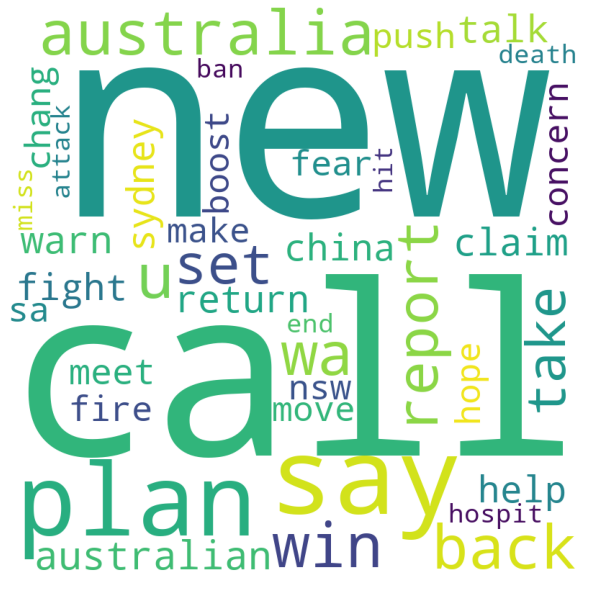

In [26]:
#  Wordcloud of Top N words in each topic

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

words = ""
for line in processed_docs:
    for word in line:
        words += word + " "

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 13,
                      max_words=40).generate(words) 

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [67]:
#visualize with pyLDAvis

import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


pyLDAvis.gensim_models.prepare(lda_model,bow_corpus,dictionary=lda_model.id2word)

/home/simon/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of imp

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.233887 -0.057544       1        1  15.314143
8     -0.111229  0.109879       2        1  11.082408
0     -0.235595 -0.085799       3        1  10.417304
5     -0.249743 -0.231008       4        1  10.015401
2      0.238915 -0.219822       5        1   9.787526
1      0.116892  0.007898       6        1   9.737106
9      0.045399  0.190881       7        1   8.936744
3     -0.034332  0.025329       8        1   8.926253
7      0.039693  0.035801       9        1   8.925666
6     -0.043887  0.224384      10        1   6.857449, topic_info=       Term           Freq          Total Category  logprob  loglift
675     the   96376.000000   96376.000000  Default  30.0000  30.0000
16      for  113270.000000  113270.000000  Default  29.0000  29.0000
53     over   38809.000000   38809.000000  Default  28.0000  28.0000
31       to  197003.000000  197003.000000  Default  27.0000  27.0000
23       in  152985.000000  152985.000000  Default  26.0000  26.0000
..      ...            ...            ...      ...      ...      ...
23       in   10855.911013  152985.054098  Topic10  -3.8727   0.0342
208     not    4689.984408   14827.417199  Topic10  -4.7120   1.5288
672     afl    3508.386917    6318.348215  Topic10  -5.0023   2.0915
285    hear    3147.195163    4770.353187  Topic10  -5.1109   2.2639
374  murder    3638.730189   14076.959791  Topic10  -4.9658   1.3269

[520 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
63         4  0.999785       10
19152      7  0.999558     2016
18384      3  0.999730     2018
24370      7  0.999883     2019
14         2  0.301835        a
...      ...       ...      ...
1318       4  0.999939     year
2038       9  0.999828      you
442        8  0.999788    young
502        2  0.999739     your
472        4  0.999784  zealand

[732 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 1, 6, 3, 2, 10, 4, 8, 7])

# Running LDA using TF-IDF

In [37]:
# define LDA model using the TF-IDF dictionary

lda_model_tdidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=2)

TypeError: 'int' object is not iterable

In [ ]:
# Wordcloud of Top N words in each topic

In [ ]:
#visualize with pyLDAvis
# What are the differences between those two approaches ?

# Performance evaluation by classifying sample document using LDA Bag of Words model

In [45]:
# vusualize a document
processed_docs[4310]

['ratepay', 'group', 'want', 'compulsori', 'local', 'govt', 'vote']

In [46]:
# visualize the performance of the LDA model on the Bag of Words
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6383416652679443	 
Topic: 0.065*"to" + 0.013*"how" + 0.012*"on" + 0.012*"donald" + 0.010*"health" + 0.009*"help" + 0.009*"over" + 0.009*"school" + 0.008*"rural" + 0.008*"chang"

Score: 0.13707676529884338	 
Topic: 0.042*"to" + 0.021*"what" + 0.021*"in" + 0.021*"court" + 0.016*"who" + 0.013*"sentenc" + 0.013*"case" + 0.012*"guilti" + 0.011*"final" + 0.010*"morrison"

Score: 0.13695134222507477	 
Topic: 0.030*"of" + 0.023*"in" + 0.021*"to" + 0.019*"govern" + 0.016*"child" + 0.013*"nsw" + 0.013*"a" + 0.012*"show" + 0.011*"tasmania" + 0.011*"queensland"

Score: 0.012520784512162209	 
Topic: 0.109*"for" + 0.025*"call" + 0.015*"more" + 0.014*"elect" + 0.012*"new" + 0.010*"big" + 0.008*"than" + 0.007*"a" + 0.007*"time" + 0.007*"announc"

Score: 0.012519127689301968	 
Topic: 0.026*"in" + 0.025*"to" + 0.023*"u" + 0.017*"for" + 0.014*"protest" + 0.013*"on" + 0.012*"of" + 0.012*"peopl" + 0.012*"polic" + 0.011*"a"

Score: 0.01251885574311018	 
Topic: 0.022*"australia" + 0.020*"on" + 0.01

 The test document has the highest probability to be part of the topic that the model assigned, which is the accurate classification.

# Performance evaluation by classifying sample document using LDA TF-IDF model

In [ ]:
# visualize the performance of the LDA model on the TF-IDF dictionary

# Testing model on unseen document

In [61]:
# define and test an unseen document, what can you observe ?

unseen_document = pd.read_csv("data/Youtube04-Eminem.csv") 
unseen_document.head()


COMMENT_ID         AUTHOR  \
0    z12rwfnyyrbsefonb232i5ehdxzkjzjs2    Lisa Wellas   
1  z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04   jason graham   
2    z13vsfqirtavjvu0t22ezrgzyorwxhpf3     Ajkal Khan   
3  z12wjzc4eprnvja4304cgbbizuved35wxcs  Dakota Taylor   
4    z13xjfr42z3uxdz2223gx5rrzs3dt5hna    Jihad Naser   

                         DATE  \
0                         NaN   
1  2015-05-29T02:26:10.652000   
2                         NaN   
3  2015-05-29T02:13:07.810000   
4                         NaN   

                                             CONTENT  CLASS  
0          +447935454150 lovely girl talk to me xxx﻿      1  
1    I always end up coming back to this song<br />﻿      0  
2  my sister just received over 6,500 new <a rel=...      1  
3                                              Cool﻿      0  
4                     Hello I&#39;am from Palastine﻿      1

In [65]:
unseen_document.CONTENT.apply(process_text)


0        [+447935454150, love, girl, talk, to, me, xxx﻿]
1      [i, alway, end, up, come, back, to, thi, song<...
2      [my, sister, just, receiv, over, 6,500, new, <...
3                                                [cool﻿]
4                    [hello, i&#39;am, from, palastine﻿]
                             ...                        
443      [subscrib, to, my, channel, x, please!., spare]
444    [check, out, my, video, guy!, :), hope, you, g...
445    [3, yr, ago, i, had, a, health, scare, but, th...
446    [rihanna, look, so, beauti, with, red, hair, ;)﻿]
447    [857.482.940, view, awesom, !!!!!!!!!!!!!!!!!!...
Name: CONTENT, Length: 448, dtype: object

In [64]:
bow_vector = dictionary.doc2bow(unseen_document.CONTENT)

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.10000000149011612	 Topic: 0.036*"over" + 0.029*"in" + 0.029*"of" + 0.022*"man" + 0.022*"charg"
Score: 0.10000000149011612	 Topic: 0.030*"of" + 0.023*"in" + 0.021*"to" + 0.019*"govern" + 0.016*"child"
Score: 0.10000000149011612	 Topic: 0.109*"for" + 0.025*"call" + 0.015*"more" + 0.014*"elect" + 0.012*"new"
Score: 0.10000000149011612	 Topic: 0.026*"in" + 0.025*"to" + 0.023*"u" + 0.017*"for" + 0.014*"protest"
Score: 0.10000000149011612	 Topic: 0.065*"to" + 0.013*"how" + 0.012*"on" + 0.012*"donald" + 0.010*"health"
Score: 0.10000000149011612	 Topic: 0.057*"in" + 0.033*"after" + 0.024*"year" + 0.018*"polic" + 0.018*"fire"
Score: 0.10000000149011612	 Topic: 0.042*"to" + 0.021*"what" + 0.021*"in" + 0.021*"court" + 0.016*"who"
Score: 0.10000000149011612	 Topic: 0.022*"australia" + 0.020*"on" + 0.018*"market" + 0.017*"a" + 0.017*"south"
Score: 0.10000000149011612	 Topic: 0.092*"the" + 0.033*"of" + 0.033*"in" + 0.026*"a" + 0.024*"to"
Score: 0.10000000149011612	 Topic: 0.042*"to" + 0.029